In [20]:
import pandas as pd
import os
import warnings
import datetime
warnings.filterwarnings('ignore')

In [2]:
path_to_data = r"../data/raw/stock prices"

In [34]:
# Get the list of all csv files in path_to_data and all subfolders
csv_files = []
for root, dirs, files in os.walk(path_to_data):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(os.path.join(root, f))

csv_files

['../data/raw/stock prices\\aal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\algt_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\alk_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\dal_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\ita_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\iyt_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\jblu_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\jets_intraday-15min_historical-data-05-31-2025.csv',
 '../data/raw/stock prices\\luv_intraday-15min_historical-data-05-30-2025.csv',
 '../data/raw/stock prices\\ual_intraday-15min_historical-data-05-30-2025.csv']

In [35]:
# Loop through the files, limiting columns and appending airline tickers to a df
for file in csv_files:
    ticker = file.split('_')[0].split('\\')[-1].upper()  # Extract ticker from filename

    if file == csv_files[0]:
        df_main = pd.read_csv(file)
        df_main['ticker'] = ticker
    else:
        df_temp = pd.read_csv(file)
        df_temp['ticker'] = ticker
        df_main = pd.concat([df_main, df_temp], ignore_index=True)
df_main['ticker'].value_counts()

ticker
AAL     20000
ALGT    20000
ALK     20000
DAL     20000
ITA     20000
IYT     20000
JBLU    20000
JETS    20000
LUV     20000
UAL     20000
Name: count, dtype: int64

In [36]:
df_main = df_main.dropna(subset=['Open'])
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker
0,2022-05-03 11:15,18.6900,18.7700,18.665,18.7450,0.0550,+0.29%,844892.0,AAL
1,2022-05-03 11:30,18.7450,18.8550,18.735,18.8350,0.0900,+0.48%,790483.0,AAL
2,2022-05-03 11:45,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31%,600037.0,AAL
3,2022-05-03 12:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26%,738723.0,AAL
4,2022-05-03 12:15,18.7300,18.8200,18.730,18.7400,0.0128,+0.07%,582906.0,AAL
...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45,79.2600,79.6200,79.180,79.4800,0.2300,+0.29%,144655.0,UAL
199995,2025-05-30 15:00,79.4900,79.7650,79.420,79.5200,0.0400,+0.05%,169821.0,UAL
199996,2025-05-30 15:15,79.5500,79.9600,79.420,79.9100,0.3900,+0.49%,402686.0,UAL
199997,2025-05-30 15:30,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19%,232344.0,UAL


In [37]:
df_main = df_main.dropna()
# Convert 'Time' column to datetime format
df_main['Time'] = pd.to_datetime(df_main['Time'], format='%Y-%m-%d %H:%M')
df_main['%Chg'] = df_main['%Chg'].str.replace('%', '').astype(float)
df_main = df_main[df_main['Time'] >= datetime.datetime(2022,5,3,11,15)]
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker
0,2022-05-03 11:15:00,18.6900,18.7700,18.665,18.7450,0.0550,0.29,844892.0,AAL
1,2022-05-03 11:30:00,18.7450,18.8550,18.735,18.8350,0.0900,0.48,790483.0,AAL
2,2022-05-03 11:45:00,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31,600037.0,AAL
3,2022-05-03 12:00:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26,738723.0,AAL
4,2022-05-03 12:15:00,18.7300,18.8200,18.730,18.7400,0.0128,0.07,582906.0,AAL
...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45:00,79.2600,79.6200,79.180,79.4800,0.2300,0.29,144655.0,UAL
199995,2025-05-30 15:00:00,79.4900,79.7650,79.420,79.5200,0.0400,0.05,169821.0,UAL
199996,2025-05-30 15:15:00,79.5500,79.9600,79.420,79.9100,0.3900,0.49,402686.0,UAL
199997,2025-05-30 15:30:00,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19,232344.0,UAL


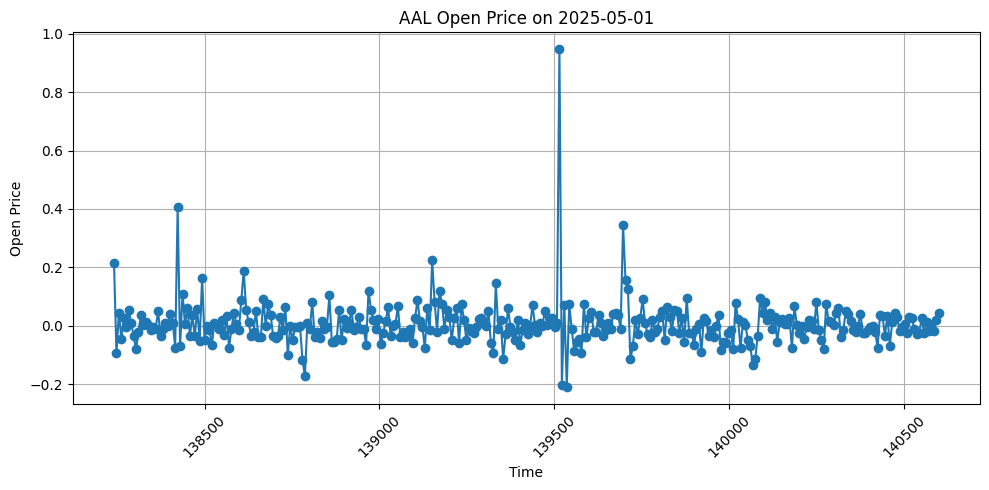

In [26]:
# Line plot of open price for AAL where date between 2025-05-01 and 2025-05-10
import matplotlib.pyplot as plt
df_aal = df_main[df_main['ticker'] == 'AAL']
df_aal = df_aal[(df_aal['Time'] >= '2025-05-01') & (df_aal['Time'] <= '2025-05-20')]
plt.figure(figsize=(10, 5))
plt.plot(df_aal.index, df_aal['Change'], marker='o', linestyle='-')
plt.title('AAL Open Price on 2025-05-01')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()


(-2.0, 2.0)

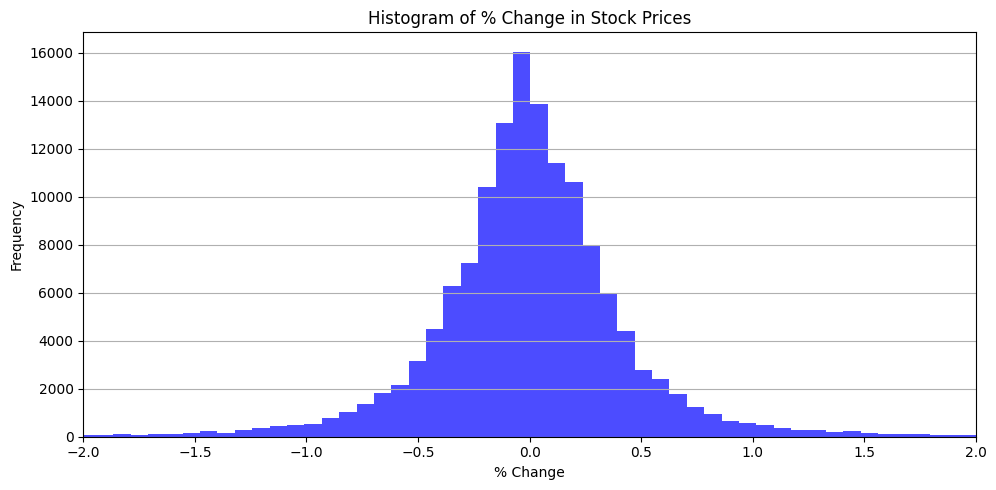

In [27]:
# histogram of %Chg
plt.figure(figsize=(10, 5))
plt.hist(df_main['%Chg'], bins=500, color='blue', alpha=0.7)
plt.title('Histogram of % Change in Stock Prices')
plt.xlabel('% Change')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.xlim(-2,2)

## Feature Engineering

### Finance Vars
- High-Low spread
- High-Low % spread
- Last-Open spread
- Last-Open % spread
- Rolling variance
- variance of Rolling variance

### Lags
- idk how many to use

### Dummies
- Day of week
- Hour of day
- Month of year
- First observation per day

In [49]:
# Finance variables
df_main['High-Low']   =  df_main['High'] - df_main['Low']
df_main['High-Low%']  = (df_main['High'] / df_main['Open']) - 1
df_main['Last-Open']  =  df_main['Open'] - df_main['Last']
df_main['Last-Open%'] = (df_main['Open'] / df_main['Last']) - 1

# 10-period rolling variance
df_main['Roll_SD_Last_10'] = df_main.groupby('ticker')['Last'].rolling(window=10).std().reset_index(level=0, drop=True)
df_main['Roll_SDSD_Last_10'] = df_main.groupby('ticker')['Roll_SD_Last_10'].rolling(window=10).std().reset_index(level=0, drop=True)

df_main['Roll_SD_Volume_10'] = df_main.groupby('ticker')['Volume'].rolling(window=10).std().reset_index(level=0, drop=True)
df_main['Roll_SDSD_Volume_10'] = df_main.groupby('ticker')['Roll_SD_Volume_10'].rolling(window=10).std().reset_index(level=0, drop=True)

In [50]:
df_main

,Time,Open,High,Low,Last,Change,%Chg,Volume,ticker,High-Low,High-Low%,Last-Open,Last-Open%,Rolling_Variance,Roll_Var_Last_10,Roll_VarVar_Last_10,Roll_SD_Last_10,Roll_SDSD_Last_10,Roll_SD_Volume_10,Roll_SDSD_Volume_10
0,2022-05-03 11:15:00,18.6900,18.7700,18.665,18.7450,0.0550,0.29,844892.0,AAL,0.1050,0.004280,-0.0550,-0.002934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-03 11:30:00,18.7450,18.8550,18.735,18.8350,0.0900,0.48,790483.0,AAL,0.1200,0.005868,-0.0900,-0.004778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-03 11:45:00,18.8400,18.8500,18.740,18.7761,-0.0589,-0.31,600037.0,AAL,0.1100,0.000531,0.0639,0.003403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-03 12:00:00,18.7703,18.8100,18.654,18.7272,-0.0489,-0.26,738723.0,AAL,0.1560,0.002115,0.0431,0.002301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-03 12:15:00,18.7300,18.8200,18.730,18.7400,0.0128,0.07,582906.0,AAL,0.0900,0.004805,-0.0100,-0.000534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,2025-05-30 14:45:00,79.2600,79.6200,79.180,79.4800,0.2300,0.29,144655.0,UAL,0.4400,0.004542,-0.2200,-0.002768,0.358516,0.358516,0.009421,0.598762,0.110445,47740.900266,4953.878558
199995,2025-05-30 15:00:00,79.4900,79.7650,79.420,79.5200,0.0400,0.05,169821.0,UAL,0.3450,0.003460,-0.0300,-0.000377,0.311049,0.311049,0.009511,0.557718,0.108516,52320.000572,4930.155855
199996,2025-05-30 15:15:00,79.5500,79.9600,79.420,79.9100,0.3900,0.49,402686.0,UAL,0.5400,0.005154,-0.3600,-0.004505,0.254889,0.254889,0.007514,0.504865,0.092079,102610.581952,18510.212673
199997,2025-05-30 15:30:00,79.9200,80.0649,79.560,79.7600,-0.1500,-0.19,232344.0,UAL,0.5049,0.001813,0.1600,0.002006,0.274649,0.274649,0.006166,0.524070,0.081629,106247.824199,25102.479218
